#### Inferential Statistics on the data

In [63]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

#Understanding the data
dictionary = pd.read_excel("Data/neis-data-dictionary_terms.xlsx")
main       = pd.read_excel("Data/neisdatagovhack_Main.xlsx")
dict_df = pd.DataFrame.from_dict(dictionary, orient='columns', dtype=None)
main_df = pd.DataFrame.from_dict(main, orient='columns', dtype=None)
print(dict_df)
print(main_df.info())
print(main_df.describe())

         Variable name                               Variable description  \
0          business_id                 Unique identifier for the business   
1           start_date  The date the NEIS participant entered the NEIS...   
2             end_date  The date the NEIS participant exited the NEIS ...   
3            neis_type  The employment services program in which the b...   
4          exit_reason  The reason for which the NEIS participant exit...   
5           successful  Indicates whether the NEIS participant success...   
6          anzsic_code                 The industry code for the business   
7        industry_type       The broad industry category for the business   
8                state             The state or territory of the business   
9                metro  Indicates whether the location of the business...   
10           age_group                  Age group of the NEIS participant   
11           gender_cd              Sex indicator of the NEIS participant   

        business_id   anzsic_code         metro      sv_month       sv_year  \
count  53646.000000  53596.000000  53646.000000  11147.000000  11147.000000   
mean   26827.169258   7423.195780      0.058308      6.606262   2012.755898   
std    15488.324811   2428.965571      0.234327      3.435323      1.818195   
min        1.000000    100.000000      0.000000      1.000000   2009.000000   
25%    13414.250000   5259.000000      0.000000      4.000000   2011.000000   
50%    26827.500000   7869.000000      0.000000      6.000000   2012.000000   
75%    40239.750000   9525.000000      0.000000     10.000000   2014.000000   
max    53654.000000   9901.000000      1.000000     12.000000   2017.000000   

       sv_hours_work  sv_staff_lt35h  sv_staff_gt35h  sv_end_train  \
count    8102.000000     5803.000000     5296.000000   3049.000000   
mean       35.280449        0.558849        0.405778      1.296491   
std        21.909007        2.007426        2.342488      0.598547   
min     

In [64]:
#Data Cleaning - This step is already performed as part of Data wrangling. Features are identified.
# Replace Nan/ missing values in the feature 'SV_HOURS_WORK' with the mean value of the non-NAN values.
main_df.sv_hours_work = main_df.sv_hours_work.fillna(main_df.sv_hours_work.mean())
main_df.describe()


,business_id,anzsic_code,metro,sv_month,sv_year,sv_hours_work,sv_staff_lt35h,sv_staff_gt35h,sv_end_train,sv_end_mentor,sv_end_profit,sv_end_dem,sv_end_loc,sv_end_health,sv_end_oth,sv_sat_bus_train,sv_sat_mentor,sv_tailor_sup,sv_sat_overall
count,53646.000000,53596.000000,53646.000000,11147.000000,11147.000000,53646.000000,5803.000000,5296.000000,3049.000000,3075.000000,3227.000000,3144.000000,2969.000000,3044.000000,2699.000000,10700.000000,10593.000000,10582.000000,10408.000000
mean,26827.169258,7423.195780,0.058308,6.606262,2012.755898,35.280449,0.558849,0.405778,1.296491,1.386992,2.335606,1.986323,1.458404,1.499671,2.086328,4.081682,3.864628,3.716689,3.877786
std,15488.324811,2428.965571,0.234327,3.435323,1.818195,8.513877,2.007426,2.342488,0.598547,0.684782,0.821582,0.823689,0.712119,0.781607,0.923077,1.177991,1.325153,1.404108,1.305337
min,1.000000,100.000000,0.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,13414.250000,5259.000000,0.000000,4.000000,2011.000000,35.280449,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.000000
50%,26827.500000,7869.000000,0.000000,6.000000,2012.000000,35.280449,0.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000
75%,40239.750000,9525.000000,0.000000,10.000000,2014.000000,35.280449,1.000000,0.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000
max,53654.000000,9901.000000,1.000000,12.000000,2017.000000,120.000000,99.000000,55.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000


In [65]:
# Representing the gender as NUMBERS i.e. Male: 1 and Female: 0
def convert_gender(x):
    if "M" in x:
        return 1
    elif "F" in x:
        return 0
    else: return 0
    
# Representing the Success_indicators as NUMBERS i.e. SUCCESS - Y: 1 and SUCCESS - N (Failure): 0    
def convert_successful(x):
    if "Y" in x:
        return 1
    elif "N" in x:
        return 0
    else: return 0   
# Bring all the personality types as a single column in the Data frame.
def identify_personality(x):
    if x['indigenous_ind'] == 'Y':
        #return "indigenous_ind"
        return 1        
    elif x['ex_offender_ind'] == 'Y':
        #return "ex_offender_ind"
        return 1        
    elif x['nesb_ind'] == 'Y':
        #return "nesb_ind"
        return 1        
    elif x['refugee_ind'] == 'Y':
        #return "refugee_ind"
        return 1        
    elif x['disability_ind'] == 'Y':
        #return "disability_ind"
        return 1        
    elif x['homeless_ind'] == 'Y':
        #return "homeless_ind"
        return 1        
    elif x['sole_parent_ind'] == 'Y':
        #return "sole_parent_ind"
        return 1
    else:
        #return "NO_PERSONALITY"    
        return 0

# Some of the columns store text/ Business IDs and they dont make much sense. Therefore, consider numerical columns.
main_model = main_df[['business_id','exit_reason','state','metro','age_group','gender_cd','industry_type',
                      'sv_hours_work','indigenous_ind','ex_offender_ind','nesb_ind','refugee_ind','disability_ind','homeless_ind',
                      'sole_parent_ind','successful']].copy()
#we need to find the "Success percentage per community/personality type" and check whether this correlates
# with our target.
#main_model['personality_type'] = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model['indigenous_ind'] = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.ex_offender_ind   = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.nesb_ind          = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.refugee_ind       = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.disability_ind    = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.homeless_ind      = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.sole_parent_ind   = main_model.apply(lambda row: identify_personality(row),axis=1)

# Some of the features in the above dataframe above text/ descriptions and these can be converted to numerical equivalents.
# for Instance, in "gender_cd", male can be represented as 1 and female can be represented as 0   
main_model["success_indicator"] = main_model["successful"].apply(convert_successful)
#main_model["neis_allowance_ind"] = main_model["neis_allowance_ind"].apply(convert_gender) # function for "gender" can be applied here
main_model["gender_cd"] = main_model["gender_cd"].apply(convert_gender)

main_model.describe()

,business_id,metro,gender_cd,sv_hours_work,indigenous_ind,ex_offender_ind,nesb_ind,refugee_ind,disability_ind,homeless_ind,sole_parent_ind,success_indicator
count,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000
mean,26827.169258,0.058308,0.516143,35.280449,0.475171,0.464415,0.449185,0.347854,0.339653,0.138184,0.100380,0.685046
std,15488.324811,0.234327,0.499744,8.513877,0.499388,0.498737,0.497416,0.476294,0.473596,0.345096,0.300509,0.464502
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13414.250000,0.000000,0.000000,35.280449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26827.500000,0.000000,1.000000,35.280449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,40239.750000,0.000000,1.000000,35.280449,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,53654.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
#### Success/Failure in business for various personalities#######

main_melt3 = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['indigenous_ind', 'ex_offender_ind',
       'nesb_ind', 'refugee_ind', 'disability_ind', 'homeless_ind',
       'sole_parent_ind'],var_name='Personality',value_name='PersVal')
main_filter3 = main_melt3.query("PersVal == 'Y'")

# Replace N/A values with 0 in the columns of pivot table
main_pivot3 = main_filter3.pivot_table(values=None, index=['industry_type','successful'], columns='Personality', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print(main_pivot3)

                                                  PersVal                  \
Personality                                disability_ind ex_offender_ind   
industry_type                   successful                                  
accommodation_cafes_restaurants N                      65               5   
                                Y                     107               7   
agriculture_forestry_fishing    N                      70               7   
                                Y                     151              26   
communication                   N                      23               4   
                                Y                      42              12   
construction                    N                     199              71   
                                Y                     440             141   
cultural_and_recreational       N                     448              76   
                                Y                     864              81   

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


                     industry_type      Personality  successful  count
0  accommodation_cafes_restaurants   disability_ind           0     65
1  accommodation_cafes_restaurants   disability_ind           1    107
2  accommodation_cafes_restaurants  ex_offender_ind           0      5
3  accommodation_cafes_restaurants  ex_offender_ind           1      7
4  accommodation_cafes_restaurants     homeless_ind           0      9


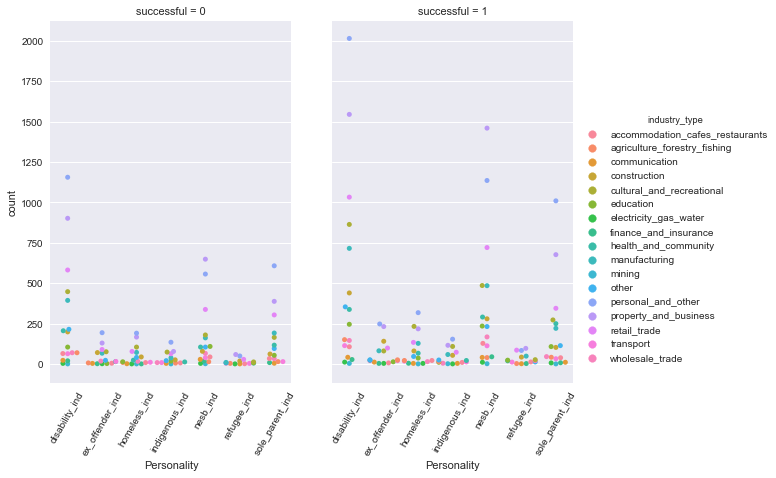

In [67]:

main_person = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['indigenous_ind', 'ex_offender_ind',
       'nesb_ind', 'refugee_ind', 'disability_ind', 'homeless_ind',
       'sole_parent_ind'],var_name='Personality',value_name='PersVal')
main_filter = main_person.query("PersVal == 'Y'")
#Replace the values with numbers to plot graphs
main_filter['PersVal'].replace(to_replace=dict(Y=1, N=0), inplace=True)
main_filter['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
#print(main_filter.head(3))

#Set the index
main_filter.set_index = ['industry_type','successful','Personality']

# Aggregate on 'industry_type','Personality','successful' to get the count of people involved
####Data frame main_aggr will be used in various data visualisation to understand the correlation between the Personality
# of the business owner, Industry type, success rate etc.
main_aggr_Personality = main_filter.groupby(['Personality','successful']).size().rename('count').reset_index()
main_aggr = main_filter.groupby(['industry_type','Personality','successful']).size().rename('count').reset_index()
print(main_aggr.head())

"""Make a bee swarm plot to identify the involvement of communities in the Industries"""
# Make bee swarm plot
#_ = sns.swarmplot(x='Personality',y='count',hue='industry_type',data=main_aggr,dodge=True)
_ = sns.factorplot(x="Personality", y="count",
                        hue="industry_type", col="successful",
                        data=main_aggr, kind="swarm",
                        size=6, aspect=.7);
for ax in _.axes.flatten(): 
    for tick in ax.get_xticklabels(): 
        tick.set(rotation=60)
#plt.xticks(rotation=45)
# Label axes
#_ = plt.xlabel('Personality')
#_ = plt.ylabel('Involvement')

# Show the plot
plt.show()

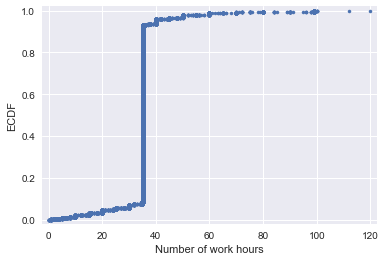

In [68]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

work_hours = main_model.sv_hours_work.values
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(work_hours)

# Generate plot
sns.set()
_ = plt.plot(x_vers,y_vers,marker='.',linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Number of work hours')
_ = plt.ylabel('ECDF')


# Display the plot
plt.show()


#### On analysing the above chart, we find 80% of the businesses have work hours less than 35

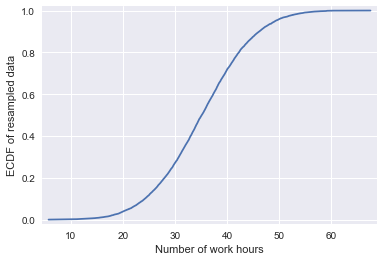

In [69]:
#### Checking the Normality of the data
mean = np.mean(work_hours)

std = np.std(work_hours)

### Bootstrapping - RESAMPLE THE DATA AND CHECK WHETHER ECDF is normally distributed
samples = np.random.normal(mean,std,size=10000)

#### Check the X and Y for the actual and theorotical samples 
x_theo,y_theo = ecdf(samples)

# Generate plot
sns.set()

#_ = plt.plot(x_vers,y_vers,marker='.',linestyle='none')

# Make the margins nice
#plt.margins(0.02)

# Label the axes
#_ = plt.xlabel('Number of work hours')
#_ = plt.ylabel('CDF')


# Display the plot
plt.show()

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Number of work hours')
_ = plt.ylabel('ECDF of resampled data')
_ = plt.plot(x_theo,y_theo)
plt.show()

According to the theorotical CDF distribution, we can assume that 97% of the businesses have > 50 hours of
work hours per week. This is very different from the actual results as the field 'SV_HOURS_WORK' had most of its NULL
values replaced with Mean (Data present in that column). 

#### Theorotical ECDF appears to be normally distributed

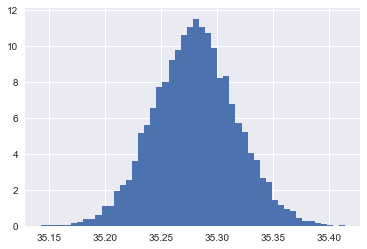

In [70]:
### Draw bootstrap replicates and check whether the plot is normally distributed
def draw_bootstrap(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data,len(data)))

    return bs_replicates

replicates = draw_bootstrap(work_hours, np.mean, size=10000)
# Make histograms
plt.hist(replicates,normed=True,bins=50)

# Display the plot
plt.show()

There is more area on the left that that on the right. Therefore, the bootstrap replicates are not NORMALLY DISTRIBUTED

In [71]:
#### Determine the Confidence Interval ####

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(replicates,[2.5, 97.5])
print('95% Confidence interval is :', conf_int)

95% Confidence interval is : [35.20969017 35.35312785]


#### Null Hypothesis: Mean working hours of business is greater than or equal to 50?

In [72]:
#### We need to perform One sample bootstrap Hypothesis test to check whether Mean working hours of businesses is
#### greater than or equal to 50
translated_work_hours = work_hours - np.mean(work_hours) + 50

# Take bootstrap replicates of translated work_hours: bs_replicates
bs_replicates = draw_bootstrap(translated_work_hours,np.mean, 10000)

# Compute fraction of replicates that are greater than the observed mean work hours: p
p = np.sum(bs_replicates >= 50) / 10000

# Print the p-value
print('p = ', p)

p =  0.4929


P value of 0.49 implies that the P value is greater than the significant level(0.05,0.01,0.001) and also suggests that we accept (the NULL hypothesis) that the mean working hours of businesses can be greater than or equal to 50.

### NULL Hypothesis test ###
 Hyothesis: Check whether there is equal participation from aboriginal individuals as from the other personalities
            In other words, whether the aboriginals are participating in the same ratio as that of other personalities?

In [73]:

# Test-Statistic used: Difference in Means

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff
#############################
# Combine the Black and White calls before drawing random data
def permutation_sample(data1, data2):
    #Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2
#############################
def draw_perm_reps(data_1, data_2, func, size=1):
    #Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates
#############################
#print(main_melt3.head())
Ind_Business = main_melt3.query("Personality == 'indigenous_ind'")
Ind_Business['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
other_business = main_melt3.query("Personality != 'indigenous_ind'")
other_business['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
Ind_array = Ind_Business['successful'].values.tolist()
other_array = other_business['successful'].values.tolist()


/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [74]:

# Compute the actual fraction
actual_ind = diff_of_means(Ind_array,other_array)

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(Ind_array, other_array, diff_of_means, 1000)


# Compute and print p-value: p. 
p = np.sum(perm_replicates <= actual_ind) / len(perm_replicates) # the fraction should be number of succ.Ind.Business/failed Ind.Business
print('p-value =', p)

p-value = 0.485


#######################################
#### Inference of Hypothesis test
#######################################
 
 We got a p-Value of 0.48 after conducting the bootstrap tests, which proves that the Null hypothesis is true. 
 i.e. Less Number of participants from Aboriginal community was by chance and Government need not take any 
 additional measures to increase the participation of this community.